## Aufgabe 3

In [46]:
# Pakete
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, sobel_h,sobel_v,gaussian
from skimage.color import rgb2gray



### Aufgabe 3.1


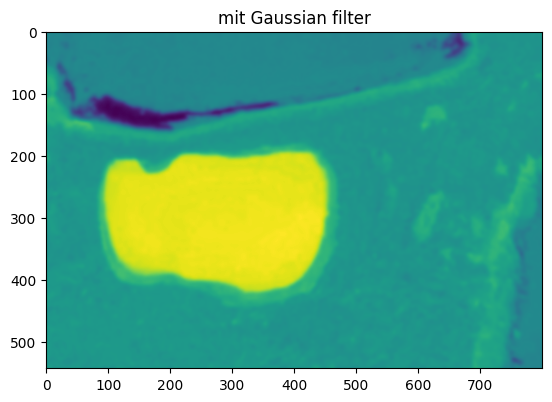

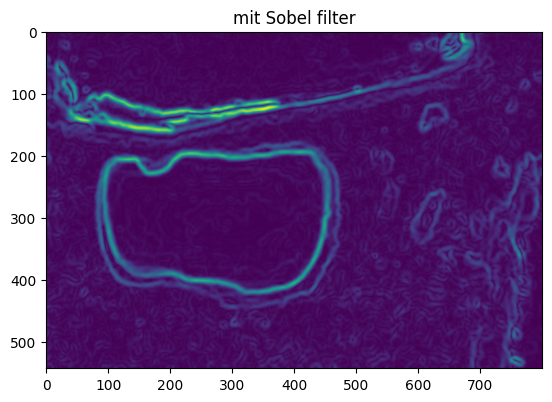

In [47]:

# Lade das Bild
image = imread('./bilder-Wk08/ergebnis_aufgabe2.png')

# Wende den Gauß-Filter an
image = gaussian(image, sigma=2)

gradientImg=sobel(image)


plt.figure(1)
plt.title('mit Gaussian filter')
plt.imshow(image)

plt.figure(2)
plt.title('mit Sobel filter')
plt.imshow(gradientImg)

#rImg= image[:,:,0]-image[:,:,1]*.5-image[:,:,2]*.5

rImg=image
rImg -=np.min(rImg)
rImg *= 1/np.max(rImg)

rotGradientenImg= sobel(rImg)
# plt.figure(3)
# plt.imshow(rotGradientenImg)

orientation =np.degrees(np.arctan(sobel_v(rImg)/(1e-10+sobel_h(rImg))))

orientation[np.logical_and(orientation>-22.5,orientation<22.5)]=0
orientation[np.logical_and(orientation>=67.5,orientation<67.5)]=-45
orientation[np.logical_and(orientation>22.5,orientation<67.5)]=45
orientation[np.logical_and(orientation<-67.5,orientation>67.5)]=90

thinnedGradient= np.zeros_like(rotGradientenImg)






## Aufg 3.2 + 3.3+3.4

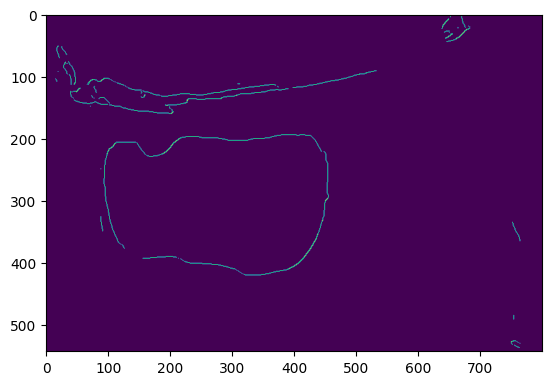

In [48]:
#Aufg 3.3
def getNeighboursByAngle(angle,x,y, shape):
    xs=[]
    ys=[]
    if angle==0:
        if x-1 >=0:
            xs.append(x-1)
            ys.append(y)
        if x+1 < shape[0]:
            xs.append(x+1)
            ys.append(y)
    elif angle == -45:
        if x+1 < shape[0] and y-1 >=0:
            xs.append(x+1)
            ys.append(y-1)
        if x-1 >=0 and y+1 < shape[1]:
            xs.append(x-1)
            ys.append(y+1) 
    elif angle == 45:
        if x-1 >=0 and y-1 >=0:
            xs.append(x-1)
            ys.append(y-1)
        if x+1 < shape[0] and y+1 < shape[1]:
            xs.append(x+1) 
            ys.append(y+1)
    else:
        if y-1 >=0:
            xs.append(x)
            ys.append(y-1)
        if y+1 < shape[1]:
            xs.append(x)
            ys.append(y+1)
    return xs, ys

#Aufg 3.2
for x in range(orientation.shape[0]):
    for y in range(orientation.shape[1]):
        angle=orientation[x,y]
        xs,ys= getNeighboursByAngle(angle,x,y,orientation.shape)

        if rotGradientenImg[x,y]>= np.max(rotGradientenImg[xs,ys]):
            thinnedGradient[x,y]=rotGradientenImg[x,y]

plt.figure(4)

#Aufg 3.4
plt.imshow(thinnedGradient >.03)

## Antwort zu 3.3:
# Ausdünnung hat Erfolg
